## Session 4 - Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

1. <b>Replace the missing value by 0</b>

    mean = (27+0+0)/8 = 3.37
    => The Data is skewed toward 0. Mean is skewed towards 0.
    => variables like length, weigth, string, replacing NA by zero is not possible.
    => Varianle like temprature: imputing by zero may not be relevant.
    
    
2. <b>Ignore the missing value or drop the missing values</b>

   mean = 27/6 = 4.5 
   => make the data bias, because your are deleting the obeservation. --> Random sample may not remain random.
   => (Massive) loss of information.
   
   
3. <b>Replace the missing value by mean/median if the data is</b> 

    mean = 4.5 (Ignoring the missing value)
    Replace all the missing value by mean. 
    same way we can perfor the same operation for median.
    if we have skewed distribution, that may be tranform into skewed distribution through log transformation. then we can       replace the missing value by mean(log(X)), then we can transform the logX back to X.
    
4. <b>Replace by mode if the data is categorical</b>
    probability of variable with high frequency (Mode) is high. Thats why we replace the missing value with Mode in         categorical data.
    if there are more than 2 mode or if there are two variable with very small differenc in frequency. Then we go with the  inter realtion of these varialble with other variable.(We have to go for local mode rather than global mode)

5. <b>Replace by the 99th percentile.</b>



In [9]:
# 2,3,4,5,'NA',6,7,'NA'

{2, 3, 4, 5, 6, 7, 'NA'}

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading the data
import os
#os.chdir("C:\\Users\\Gourab\\Desktop\\R")

fram = pd.read_csv("framingham.csv")

In [6]:
fram.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [3]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 1. The isnul() method

In [13]:
fram.isnull().head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Getting the number of missing values
fram.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
#Plotting the missing value information
x = fram.isnull().sum()
x[x>0]
x

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

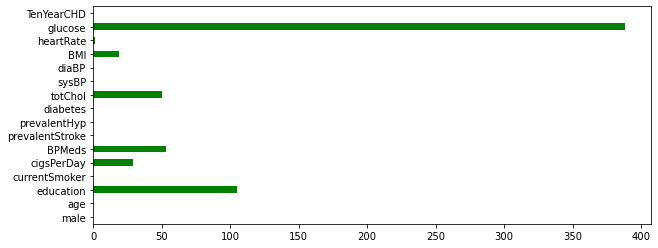

In [33]:
x.plot(kind='barh',figsize=(10,4),color='green')

In [31]:
#Getting the percentage of missing values
round(fram.isnull().sum()/len(fram)*100,3)

male               0.000
age                0.000
education          2.476
currentSmoker      0.000
cigsPerDay         0.684
BPMeds             1.250
prevalentStroke    0.000
prevalentHyp       0.000
diabetes           0.000
totChol            1.179
sysBP              0.000
diaBP              0.000
BMI                0.448
heartRate          0.024
glucose            9.151
TenYearCHD         0.000
dtype: float64

In [32]:
#Only the variables that contains the missing values
x1 = round(fram.isnull().sum()/len(fram)*100,3)
x1[x1>0]

education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

#### 2. Complete Case Analysis

1. Rows are also called cases/recods/observation
2. Row containing atleast one missing value are called incomplete cases
3. Rows which do not contain any missing values are called complete cases.

In [37]:
#Complete case considering all the variables
fram2 = fram.dropna()  # Drop all the missing value from fram
fram2

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [38]:
len(fram) - len(fram2)

582

In [40]:
sum(fram.isnull().sum())


645

In [42]:
# There are 645 missing value in the data set
# number of data points deleted in fram2 from fram1

582*16-645

8667

In [44]:
fram.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [47]:
#Complete case considering a subset of variables
fram3 = fram.dropna(subset = ['totChol','BMI','glucose'])
fram3.shape

(3828, 16)

In [51]:
len(fram) - len(fram3)

412

#### 3. Mean or Median Imputation

In [52]:
#The variables containing the missing values


In [53]:
#Making a copy of the data
fram3 = fram.copy()

In [54]:
#Mean of all the variables
fram3.mean()

male                 0.429245
age                 49.580189
education            1.979444
currentSmoker        0.494104
cigsPerDay           9.005937
BPMeds               0.029615
prevalentStroke      0.005896
prevalentHyp         0.310613
diabetes             0.025708
totChol            236.699523
sysBP              132.354599
diaBP               82.897759
BMI                 25.800801
heartRate           75.878981
glucose             81.963655
TenYearCHD           0.151887
dtype: float64

In [56]:
#Imputing the missing values in the variable totChol using the mean
#Mean of age
fram3.totChol.mean()

236.69952267303103

In [63]:
#fram3.totChol.isnull().sum()

np.sum(fram3.totChol.isnull())

50

In [65]:
#Spotting the missing values in the variable totChol
fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()

<ipython-input-65-1b2eef02af9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()


In [68]:
#Checking if the missing values got imputed
np.sum(fram3.totChol.isnull())

0

In [69]:
#Re-checking the mean of the variable
fram3.totChol.mean()

236.69952267303108

In [72]:
#Impute the missing values of the variable BMI with median (Do Yourself)
fram3.BMI.median()



25.4

In [74]:
np.sum(fram3.BMI.isnull())

19

In [76]:
fram3.BMI[fram3.BMI.isnull()] = fram3.BMI.median()


<ipython-input-76-4f2ed5e30238>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fram3.BMI[fram3.BMI.isnull()] = fram3.BMI.median()


In [77]:
np.sum(fram3.BMI.isnull())

0

#### 4. Choosing Mean Imputation Vs Median Imputation

In [ ]:
#Check the distribution of the variable - If highly skewed go for median


In [ ]:
#Taking the log transformation of the variable


In [ ]:
#Histogram of the log transformed variable


In [ ]:
#Dropping logBMI


#### 5. Imputation for Categorical Variable

In [84]:
#Mode imputation
pd.crosstab(fram3.education, columns='counts')/(4240-105)*100


col_0,counts
education,
1.0,44.135429
2.0,30.302297
3.0,16.662636
4.0,11.438936


In [81]:
# Count
pd.crosstab(fram3.education, columns='counts')

col_0,counts
education,
1.0,1720
2.0,1253
3.0,689
4.0,473


In [82]:
#Impute the missing values by the most frequent value
fram3['education'][fram3['education'].isnull()] = 1

<ipython-input-82-d617cf139429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fram3['education'][fram3['education'].isnull()] = 1


In [86]:
pd.crosstab(fram3.education, columns='counts')

col_0,counts
education,
1.0,1825
2.0,1253
3.0,689
4.0,473


In [88]:
pd.crosstab(fram3.education, columns='counts')/(4240-105)*100

col_0,counts
education,
1.0,44.135429
2.0,30.302297
3.0,16.662636
4.0,11.438936


### Home Work
    1. Could we replace the missing value in totChol, by any other approch other than global mean.
    2. Weather we can approch a missing value with some other aaproch with logical sense.
    3. Find the number of outlies in totChol ie above upper bech marks and below lower becnch mark.
    4. Replace the outlies of the varriable totChol by the upper  bench mark and lower bench mark respectively. This Technique is called Winsorization

### Part B - Outlier Analysis